# Import Libraries

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [307]:
df = pd.read_csv('ecommerce_dataset.csv')
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_5800\1865389043.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ecommerce_dataset.csv')


,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-1,11/9/2015,11/17/2015,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,6/30/2015,7/2/2015,2.0,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,12/5/2015,12/13/2015,8.0,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,5/9/2015,5/16/2015,7.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,7/9/2015,7/18/2015,9.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [308]:
df.tail()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
51298,FA-2015-30775,1/2/2016,1/6/2016,5.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51299,FA-2015-30775,1/2/2016,1/6/2016,5.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51300,FA-2015-30775,1/2/2016,1/6/2016,5.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51301,FA-2015-30775,1/2/2016,1/6/2016,5.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51302,FA-2015-30775,1/2/2016,1/6/2016,5.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan


In [309]:
#column

df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Aging', 'Ship Mode',
       'Product Category', 'Product', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region',
       'Months'],
      dtype='object')

In [310]:
#info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51303 entries, 0 to 51302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          51303 non-null  object 
 1   Order Date        51303 non-null  object 
 2   Ship Date         51303 non-null  object 
 3   Aging             51302 non-null  float64
 4   Ship Mode         51303 non-null  object 
 5   Product Category  51303 non-null  object 
 6   Product           51303 non-null  object 
 7   Sales             51303 non-null  object 
 8   Quantity          51302 non-null  object 
 9   Discount          51303 non-null  object 
 10  Profit            51303 non-null  object 
 11  Shipping Cost     51303 non-null  object 
 12  Order Priority    51301 non-null  object 
 13  Customer ID       51302 non-null  object 
 14  Customer Name     51303 non-null  object 
 15  Segment           51302 non-null  object 
 16  City              51303 non-null  object

In [311]:
#check null

df.isnull().sum()

Order ID            0
Order Date          0
Ship Date           0
Aging               1
Ship Mode           0
Product Category    0
Product             0
Sales               0
Quantity            1
Discount            0
Profit              0
Shipping Cost       0
Order Priority      2
Customer ID         1
Customer Name       0
Segment             1
City                0
State               0
Country             0
Region              1
Months              0
dtype: int64

## Missing Values Handling

In [312]:
# Identifikasi dan menghitung
# jumlah nilai yang hilang (NaN) dalam setiap kolom DataFrame di pandas.

df.isnull().sum().loc[lambda x : x > 0]

Aging             1
Quantity          1
Order Priority    2
Customer ID       1
Segment           1
Region            1
dtype: int64

In [313]:
# gunakan .index untuk tau "nama_kolom"nya

cols_contain_null = list(df.isna().sum().loc[lambda x : x > 0].index)
cols_contain_null

['Aging', 'Quantity', 'Order Priority', 'Customer ID', 'Segment', 'Region']

see [here](https://datatofish.com/rows-with-nan-pandas-dataframe/)

In [314]:
#Pilih baris dalam DataFrame pandas
#yang memiliki setidaknya satu nilai yang hilang (NaN).

df[df.isnull().any(axis = 1)]

# mengumpulkan data yang nilainya missing

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
27,AU-2015-28,9/29/2015,10/5/2015,NaN,First Class,Auto & Accessories,Car Media Players,$140.00,1,0.03,...,$5.60,High,NG-0028,Harris Armstrong,Corporate,Jinan,Shandong,China,North Asia,Sep
95,AU-2015-96,4/10/2015,4/15/2015,5.0,First Class,Auto & Accessories,Bike Tyres,$72.00,NaN,0.01,...,$3.60,Critical,ON-0096,Stokes Knudson,Consumer,Tupã,São Paulo,Brazil,South,Apr
117,AU-2015-118,8/16/2015,8/17/2015,1.0,First Class,Auto & Accessories,Car Media Players,$140.00,1,0.04,...,$5.40,High,RI-00118,Ayala Molinari,Consumer,Turin,Piedmont,Italy,NaN,Aug
131,AU-2015-132,8/12/2015,8/15/2015,3.0,First Class,Auto & Accessories,Bike Tyres,$72.00,5,0.05,...,$1.40,Critical,DT-00132,Rojas Schmidt,NaN,Los Angeles,California,United States,West,Aug
370,AU-2015-371,11/21/2015,11/25/2015,4.0,First Class,Auto & Accessories,Car Speakers,$211.00,4,0.02,...,$11.40,Medium,NaN,Herman Triggs,Consumer,Lismore,New South Wales,Australia,Oceania,Nov
625,AU-2015-626,2/3/2015,2/5/2015,2.0,First Class,Auto & Accessories,Tyre,$250.00,4,0.03,...,$14.00,NaN,TT-00626,Harper Dartt,Consumer,Coyoacán,Distrito Federal,Mexico,North,Feb
791,AU-2015-792,4/27/2015,5/1/2015,4.0,First Class,Auto & Accessories,Car Pillow & Neck Rest,$231.00,1,0.01,...,$14.90,NaN,IS-00792,Navarro Preis,Consumer,Ciudad del Carmen,Campeche,Mexico,North,Apr


In [315]:
# nama kolom 1 kata -> bisa pakai .
df.loc[df.Aging.isnull()] # AGING = Ship date - Order date (isi dengan 6)

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
27,AU-2015-28,9/29/2015,10/5/2015,NaN,First Class,Auto & Accessories,Car Media Players,$140.00,1,0.03,...,$5.60,High,NG-0028,Harris Armstrong,Corporate,Jinan,Shandong,China,North Asia,Sep


In [316]:
# QUantity kosong
df.loc[df.Quantity.isnull()]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
95,AU-2015-96,4/10/2015,4/15/2015,5.0,First Class,Auto & Accessories,Bike Tyres,$72.00,NaN,0.01,...,$3.60,Critical,ON-0096,Stokes Knudson,Consumer,Tupã,São Paulo,Brazil,South,Apr


In [317]:
# bandingkan dengan lebih tepat
df.loc[df["Product"] == "Bike Tyres"]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
5,AU-2015-6,2/25/2015,3/5/2015,8.0,First Class,Auto & Accessories,Bike Tyres,$72.00,3,0.04,...,$2.40,Critical,TO-006,Carter Barreto,Corporate,Bytom,Silesia,Poland,EMEA,Feb
14,AU-2015-15,10/12/2015,10/21/2015,9.0,First Class,Auto & Accessories,Bike Tyres,$72.00,4,0.01,...,$1.80,Medium,EY-0015,Greene Decherney,Consumer,Brisbane,Queensland,Australia,Oceania,Oct
23,AU-2015-24,11/22/2015,11/24/2015,2.0,First Class,Auto & Accessories,Bike Tyres,$72.00,4,0.02,...,$1.80,Critical,CO-0024,Copeland Lomonaco,Corporate,Celle,Lower Saxony,Germany,Central,Nov
32,AU-2015-33,8/24/2015,9/3/2015,10.0,First Class,Auto & Accessories,Bike Tyres,$72.00,4,0.05,...,$1.80,High,KI-0033,Garner Hirasaki,Consumer,Suzhou,Anhui,China,North Asia,Aug
41,AU-2015-42,2/25/2015,3/5/2015,8.0,First Class,Auto & Accessories,Bike Tyres,$72.00,5,0.02,...,$1.40,Critical,IN-0042,Terrell Zeldin,Consumer,Zigong,Sichuan,China,North Asia,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7396,AU-2015-7397,9/16/2015,9/26/2015,10.0,First Class,Auto & Accessories,Bike Tyres,$72.00,4,0.05,...,$1.80,Medium,DI-007397,Anderson Andreadi,Consumer,Toledo,Ohio,United States,East,Sep
7405,AU-2015-7406,6/10/2015,6/17/2015,7.0,First Class,Auto & Accessories,Bike Tyres,$72.00,4,0.05,...,$1.80,High,AN-007406,Mcintosh Van,Home Office,Lagos,Lagos,Nigeria,Africa,Jun
7414,AU-2015-7415,8/1/2015,8/5/2015,4.0,First Class,Auto & Accessories,Bike Tyres,$72.00,4,0.01,...,$1.80,Medium,IN-007415,Guzman Haberlin,Consumer,Ankara,Ankara,Turkey,EMEA,Aug
7425,AU-2015-7426,11/19/2015,11/26/2015,7.0,First Class,Auto & Accessories,Bike Tyres,$72.00,3,0.01,...,$2.40,Medium,LL-007426,Wells Castell,Consumer,Silopi,Sirnak,Turkey,EMEA,Nov


In [318]:
df.loc[(df['Product'] == 'Bike Tyres') & (df['Profit'] == '$36.00')]
# jadi diisi dengan 2

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months


In [319]:
# kolom 2 kata harus pakaii index []
df.loc[df['Order Priority'].isnull()]

# karena ini kategorik, gunakan modus untuk mengisinya

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
625,AU-2015-626,2/3/2015,2/5/2015,2.0,First Class,Auto & Accessories,Tyre,$250.00,4,0.03,...,$14.00,NaN,TT-00626,Harper Dartt,Consumer,Coyoacán,Distrito Federal,Mexico,North,Feb
791,AU-2015-792,4/27/2015,5/1/2015,4.0,First Class,Auto & Accessories,Car Pillow & Neck Rest,$231.00,1,0.01,...,$14.90,NaN,IS-00792,Navarro Preis,Consumer,Ciudad del Carmen,Campeche,Mexico,North,Apr


In [320]:
# kondisi tidak memungkinkan diisi dengan modus

df.loc[df['Segment'].isnull()]


,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
131,AU-2015-132,8/12/2015,8/15/2015,3.0,First Class,Auto & Accessories,Bike Tyres,$72.00,5,0.05,...,$1.40,Critical,DT-00132,Rojas Schmidt,NaN,Los Angeles,California,United States,West,Aug


In [321]:
df[df["Customer Name"] == 'Rojas Schmidt'][["Customer Name","Segment"]].head()

# pada kondisi isi tidak dapat menggunakan modus karena tidak compatible.
# isi dengan Home Office untuk Segment NaN

,Customer Name,Segment
131,Rojas Schmidt,NaN
1232,Rojas Schmidt,Home Office
3354,Rojas Schmidt,Home Office
11760,Rojas Schmidt,Home Office
12554,Rojas Schmidt,Home Office


In [322]:
df.loc[df["Customer ID"].isnull()]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
370,AU-2015-371,11/21/2015,11/25/2015,4.0,First Class,Auto & Accessories,Car Speakers,$211.00,4,0.02,...,$11.40,Medium,NaN,Herman Triggs,Consumer,Lismore,New South Wales,Australia,Oceania,Nov


In [323]:
df.loc[df["Customer Name"] == "Herman Triggs"]
# kondisi, nama herman triggs banyakk

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
370,AU-2015-371,11/21/2015,11/25/2015,4.0,First Class,Auto & Accessories,Car Speakers,$211.00,4,0.02,...,$11.40,Medium,NaN,Herman Triggs,Consumer,Lismore,New South Wales,Australia,Oceania,Nov
825,AU-2015-826,7/26/2015,8/1/2015,6.0,First Class,Auto & Accessories,Car Mat,$54.00,5,0.05,...,$1.10,High,GS-00826,Herman Triggs,Consumer,Koidu,Eastern,Sierra Leone,Africa,Jul
853,AU-2015-854,10/10/2015,10/13/2015,3.0,First Class,Auto & Accessories,Car Seat Covers,$114.00,2,0.03,...,$2.70,High,GS-00854,Herman Triggs,Consumer,Newark,Ohio,United States,East,Oct
1138,AU-2015-1139,1/22/2015,1/28/2015,6.0,First Class,Auto & Accessories,Tyre,$250.00,4,0.01,...,$16.00,High,GS-001139,Herman Triggs,Consumer,Koidu,Eastern,Sierra Leone,Africa,Jan
1266,AU-2015-1267,9/5/2015,9/15/2015,10.0,First Class,Auto & Accessories,Car Mat,$54.00,4,0.05,...,$1.40,High,GS-001267,Herman Triggs,Consumer,Hyderabad,Telangana,India,Central Asia,Sep
2781,AU-2015-2782,11/1/2015,11/9/2015,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,1,0.05,...,$5.30,High,GS-002782,Herman Triggs,Consumer,Newark,Ohio,United States,East,Nov
2789,AU-2015-2790,5/6/2015,5/8/2015,2.0,First Class,Auto & Accessories,Car Pillow & Neck Rest,$231.00,2,0.01,...,$14.60,High,GS-002790,Herman Triggs,Consumer,Koidu,Eastern,Sierra Leone,Africa,May
3031,AU-2015-3032,1/10/2015,1/12/2015,2.0,First Class,Auto & Accessories,Car Seat Covers,$114.00,1,0.03,...,$3.10,High,GS-003032,Herman Triggs,Consumer,Newark,Ohio,United States,East,Jan
3391,AU-2015-3392,1/17/2015,1/23/2015,6.0,First Class,Auto & Accessories,Car Seat Covers,$114.00,5,0.02,...,$2.30,High,GS-003392,Herman Triggs,Consumer,Newark,Ohio,United States,East,Jan
4009,AU-2015-4010,1/19/2015,1/29/2015,10.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.01,...,$16.80,High,GS-004010,Herman Triggs,Consumer,Newark,Ohio,United States,East,Jan


In [324]:
# yang kosong adalah Hermann Triggs dari Australia

df.loc[(df["Customer Name"] == "Herman Triggs") & (df["Country"] == "Australia")]
# tidak ada komparasi 

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
370,AU-2015-371,11/21/2015,11/25/2015,4.0,First Class,Auto & Accessories,Car Speakers,$211.00,4,0.02,...,$11.40,Medium,NaN,Herman Triggs,Consumer,Lismore,New South Wales,Australia,Oceania,Nov


In [325]:
df.loc[df['Region'].isnull()] # yang kosong region dari country italy, jadi kita harus lihat dari negara italy yang lainnya

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
117,AU-2015-118,8/16/2015,8/17/2015,1.0,First Class,Auto & Accessories,Car Media Players,$140.00,1,0.04,...,$5.40,High,RI-00118,Ayala Molinari,Consumer,Turin,Piedmont,Italy,NaN,Aug


In [326]:
# lihat negera italynya
df.loc[df["Country"] == "Italy"]

# Isi yang tepat untuk Region tadi yang kosong diisi dengan South -> karena mayoritas data Italy region = South

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
117,AU-2015-118,8/16/2015,8/17/2015,1.0,First Class,Auto & Accessories,Car Media Players,$140.00,1,0.04,...,$5.40,High,RI-00118,Ayala Molinari,Consumer,Turin,Piedmont,Italy,NaN,Aug
142,AU-2015-143,3/23/2015,3/26/2015,3.0,First Class,Auto & Accessories,Car Seat Covers,$114.00,4,0.05,...,$1.10,Critical,EY-00143,Robertson Coakley,Consumer,Barletta,Apulia,Italy,South,Mar
204,AU-2015-205,4/6/2015,4/16/2015,10.0,First Class,Auto & Accessories,Car Mat,$54.00,2,0.04,...,$2.70,Critical,RF-00205,Mejia Waldorf,Corporate,Pozzuoli,Campania,Italy,South,Apr
221,AU-2015-222,5/6/2015,5/7/2015,1.0,First Class,Auto & Accessories,Bike Tyres,$72.00,3,0.02,...,$2.40,Medium,LD-00222,Obrien Geld,Corporate,Prato,Tuscany,Italy,South,May
238,AU-2015-239,7/17/2015,7/21/2015,4.0,First Class,Auto & Accessories,Tyre,$250.00,4,0.01,...,$16.00,Medium,ON-00239,Frost Tron,Consumer,Bologna,Emilia-Romagna,Italy,South,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49486,FA-2015-28972,10/2/2015,10/12/2015,10.0,Standard Class,Fashion,Fossil Watch,$159.00,2,0.01,...,$7.60,Medium,LL-0039178,Walls Sumrall,Consumer,Bologna,Emilia-Romagna,Italy,South,Oct
49685,FA-2015-29171,9/28/2015,10/4/2015,6.0,Standard Class,Fashion,T - Shirts,$248.00,2,0.02,...,$15.80,Medium,KY-0039377,Cantu Zandusky,Corporate,Acireale,Sicily,Italy,South,Sep
49757,FA-2015-29243,1/28/2015,2/2/2015,5.0,Standard Class,Fashion,Running Shoes,$224.00,5,0.01,...,$13.30,Medium,BY-0039449,Bailey Bixby,Consumer,Novara,Piedmont,Italy,South,Jan
49831,FA-2015-29317,10/26/2015,11/5/2015,10.0,Standard Class,Fashion,Suits,$109.00,4,0.02,...,$2.00,Medium,NS-0039523,Vega Hopkins,Corporate,Viterbo,Lazio,Italy,South,Oct


In [327]:
# Isi null values

df.loc[df.Aging.isnull(), 'Aging'] = 6
df.loc[df.Quantity.isnull(), 'Quantity'] = 2
df.loc[df["Order Priority"].isnull(), 'Order Priority'] = "Medium"
df.loc[df["Customer ID"].isnull(), 'Customer ID'] = 'GS-Uknown' # tidak ada pembanding
df.loc[df.Region.isnull(), 'Region'] = "South"
df.loc[df.Segment.isnull(), "Segment"] = 'Home Office'

In [328]:
# ubah tipe data waktu menajdi date time

In [329]:
pd.to_datetime(df["Order Date"]).head()

0   2015-11-09
1   2015-06-30
2   2015-12-05
3   2015-05-09
4   2015-07-09
Name: Order Date, dtype: datetime64[ns]

In [330]:
pd.to_datetime(df['Ship Date']).head()

0   2015-11-17
1   2015-07-02
2   2015-12-13
3   2015-05-16
4   2015-07-18
Name: Ship Date, dtype: datetime64[ns]

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51303 entries, 0 to 51302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          51303 non-null  object 
 1   Order Date        51303 non-null  object 
 2   Ship Date         51303 non-null  object 
 3   Aging             51303 non-null  float64
 4   Ship Mode         51303 non-null  object 
 5   Product Category  51303 non-null  object 
 6   Product           51303 non-null  object 
 7   Sales             51303 non-null  object 
 8   Quantity          51303 non-null  object 
 9   Discount          51303 non-null  object 
 10  Profit            51303 non-null  object 
 11  Shipping Cost     51303 non-null  object 
 12  Order Priority    51303 non-null  object 
 13  Customer ID       51303 non-null  object 
 14  Customer Name     51303 non-null  object 
 15  Segment           51303 non-null  object 
 16  City              51303 non-null  object

In [332]:
#cols_contain_null

What is Aging in e-commerce context?
[link](https://golocad.com/glossary/aging/#:~:text=Inventory%20aging%20is%20an%20e,average%20to%20sell%20its%20stock./)

In [333]:
#ubah kolom "Sales" dalam DataFrame pandas
#dengan menghapus semua karakter yang bukan angka atau titik

# Data Prepocessing
Preprocessing Idea:
1. Column Rename
2. Order Date dan Ship Date, ubdah data-type nya menjadi datetime
3. Simbol dollar di kolom
[
    "sales", "profit", "shipping_cost"
]
dibuang, tambahkan "($)" di nama kolom
4. Remove duplicated columns, keep "first"
5. Sesuaikan datatype setiap kolom

## Columns Renaming

In [334]:
# mengubah ' ' menjadi '_'
# mengubah huruf menjadi lower case

rename_mapper = {col : col.replace(' ','_').lower() for col in df.columns}
df.rename(
    columns=rename_mapper,
    inplace=True
)

df.head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,...,shipping_cost,order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,AU-2015-1,11/9/2015,11/17/2015,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,6/30/2015,7/2/2015,2.0,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,12/5/2015,12/13/2015,8.0,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,5/9/2015,5/16/2015,7.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,7/9/2015,7/18/2015,9.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


## To Datetime datatype

In [335]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [336]:
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51303 entries, 0 to 51302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51303 non-null  object        
 1   order_date        51303 non-null  datetime64[ns]
 2   ship_date         51303 non-null  datetime64[ns]
 3   aging             51303 non-null  float64       
 4   ship_mode         51303 non-null  object        
 5   product_category  51303 non-null  object        
 6   product           51303 non-null  object        
 7   sales             51303 non-null  object        
 8   quantity          51303 non-null  object        
 9   discount          51303 non-null  object        
 10  profit            51303 non-null  object        
 11  shipping_cost     51303 non-null  object        
 12  order_priority    51303 non-null  object        
 13  customer_id       51303 non-null  object        
 14  customer_name     5130

In [338]:
df = df.sort_values(
    by=['order_id','order_date', 'ship_date'],
    ascending=[True, True, True],
    ignore_index=True
)

df.head(20)

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,...,shipping_cost,order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-10,2015-04-21,2015-05-01,10.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.02,...,$5.40,Critical,TT-0010,Shepard Witt,Consumer,Soyapango,San Salvador,El Salvador,Central,Apr
2,AU-2015-100,2015-08-06,2015-08-08,2.0,First Class,Auto & Accessories,Car Media Players,$140.00,1,0.01,...,$5.90,Critical,CK-00100,Rivera Black,Consumer,Jakarta,Jakarta,Indonesia,Southeast Asia,Aug
3,AU-2015-1000,2015-08-07,2015-08-15,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,1,0.04,...,$5.40,Critical,NT-001000,Heath O'Briant,Home Office,Aracaju,Sergipe,Brazil,South,Aug
4,AU-2015-1001,2015-09-12,2015-09-15,3.0,First Class,Auto & Accessories,Car Speakers,$211.00,4,0.04,...,$9.70,High,MS-001001,Oneill Williams,Consumer,Astrakhan',Astrakhan',Russia,EMEA,Sep
5,AU-2015-1002,2015-08-17,2015-08-24,7.0,First Class,Auto & Accessories,Car Body Covers,$117.00,3,0.04,...,$2.30,High,ER-001002,Mcmillan Weimer,Corporate,Sandy Springs,Georgia,United States,South,Aug
6,AU-2015-1003,2015-11-06,2015-11-14,8.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,4,0.03,...,$2.40,Critical,RD-001003,Bell Bickford,Consumer,Boulogne-Billancourt,Ile-de-France,France,Central,Nov
7,AU-2015-1004,2015-12-08,2015-12-15,7.0,First Class,Auto & Accessories,Tyre,$250.00,3,0.03,...,$14.80,High,ON-001004,Cox Blanton,Consumer,Strasbourg,Alsace,France,Central,Dec
8,AU-2015-1005,2015-11-24,2015-12-02,8.0,First Class,Auto & Accessories,Bike Tyres,$72.00,4,0.04,...,$1.80,Medium,ON-001005,Harvey Ellison,Consumer,Madrid,Madrid,Spain,South,Nov
9,AU-2015-1006,2015-02-16,2015-02-18,2.0,First Class,Auto & Accessories,Car Mat,$54.00,3,0.04,...,$1.80,High,ON-001006,Walsh Hamilton,Home Office,Katoomba,New South Wales,Australia,Oceania,Feb


## Remove "$" in ["sales", "profit", "shipping_cost" ]

In [339]:
dollar_cols = ["sales", "profit", "shipping_cost"]
for col in dollar_cols:
  df[col] = (
      df[col].str.replace("[^\d.]","", regex = True)

  )
  df.rename(columns={col: col+"($)"}, inplace=True)
print("Formatting & Renaming, Done!")

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_5800\1103590244.py:4: SyntaxWarning: invalid escape sequence '\d'
  df[col].str.replace("[^\d.]","", regex = True)


Formatting & Renaming, Done!


In [340]:
df.head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,140.00,2,0.05,...,4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-10,2015-04-21,2015-05-01,10.0,First Class,Auto & Accessories,Car Media Players,140.00,2,0.02,...,5.40,Critical,TT-0010,Shepard Witt,Consumer,Soyapango,San Salvador,El Salvador,Central,Apr
2,AU-2015-100,2015-08-06,2015-08-08,2.0,First Class,Auto & Accessories,Car Media Players,140.00,1,0.01,...,5.90,Critical,CK-00100,Rivera Black,Consumer,Jakarta,Jakarta,Indonesia,Southeast Asia,Aug
3,AU-2015-1000,2015-08-07,2015-08-15,8.0,First Class,Auto & Accessories,Car Media Players,140.00,1,0.04,...,5.40,Critical,NT-001000,Heath O'Briant,Home Office,Aracaju,Sergipe,Brazil,South,Aug
4,AU-2015-1001,2015-09-12,2015-09-15,3.0,First Class,Auto & Accessories,Car Speakers,211.00,4,0.04,...,9.70,High,MS-001001,Oneill Williams,Consumer,Astrakhan',Astrakhan',Russia,EMEA,Sep


In [341]:
df[["sales($)", "profit($)", "shipping_cost($)"]]

,sales($),profit($),shipping_cost($)
0,140.00,46.00,4.60
1,140.00,54.40,5.40
2,140.00,58.60,5.90
3,140.00,54.40,5.40
4,211.00,97.20,9.70
...,...,...,...
51298,78.00,26.00,2.60
51299,119.00,27.10,2.70
51300,124.00,40.30,4.00
51301,70.00,17.50,1.80


## Remove duplicated columns

In [342]:
df[df.duplicated(keep = False)]
# order id : FA-2015-30775

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
33292,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
33293,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
33294,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
33295,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
33296,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
33297,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
33298,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
33299,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
33300,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan


In [343]:
#drop duplicates
# keep = last , karna sudah di short -> order id, order date, ship date

df = df.drop_duplicates(keep = "last", ignore_index = True)

In [344]:
df.order_id.nunique(), len(df)

(51294, 51295)

In [345]:
df.order_id.nunique(), len(df) # hasilnya lebih 1 -> artinya masih ada duplikat 1
#hitung jumlah nilai unik dalam kolom "order_id"
#dan jumlah total baris dalam DataFrame pandas
#mengecek order id setiap baris

(51294, 51295)

In [346]:
df[df["order_id"] == 'FA-2015-30775'] # ternyata masih duplikat -> tapi beda bulan

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
33291,FA-2015-30775,2015-12-01,2015-12-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Dec
33292,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan


In [347]:
df.drop(labels = 33291, axis = 0, inplace = True)

In [348]:
df['order_id'].nunique(), len(df)
# sudah sama

(51294, 51294)

## Sesuaikan Datatypes

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51294 entries, 0 to 51294
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51294 non-null  object        
 1   order_date        51294 non-null  datetime64[ns]
 2   ship_date         51294 non-null  datetime64[ns]
 3   aging             51294 non-null  float64       
 4   ship_mode         51294 non-null  object        
 5   product_category  51294 non-null  object        
 6   product           51294 non-null  object        
 7   sales($)          51294 non-null  object        
 8   quantity          51294 non-null  object        
 9   discount          51294 non-null  object        
 10  profit($)         51294 non-null  object        
 11  shipping_cost($)  51294 non-null  object        
 12  order_priority    51294 non-null  object        
 13  customer_id       51294 non-null  object        
 14  customer_name     51294 non

In [350]:
df[df['quantity'] == 'abc' ]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
2468,AU-2015-322,2015-04-21,2015-04-24,3.0,First Class,Auto & Accessories,Car Mat,54.00,abc,0.02,...,5.40,Critical,CH-00322,May Französisch,Consumer,Casablanca,Grand Casablanca,Morocco,Africa,Apr


In [351]:
df.loc[df['quantity'] == 'abc', 'quantity'] = 1

In [352]:
df[df['discount'] == 'xxx']

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
1246,AU-2015-212,2015-09-02,2015-09-08,6.0,First Class,Auto & Accessories,Tyre,250.00,5,xxx,...,13.30,Medium,EE-00212,Norton Magee,Corporate,Bondy,Ile-de-France,France,Central,Sep


In [353]:
df.loc[df['discount'] == 'xxx', 'discount'] = 0.03

In [354]:
df[df['shipping_cost($)'] == ""]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
4845,AU-2015-536,2015-03-21,2015-03-24,3.0,First Class,Auto & Accessories,Tyre,250.00,4,0.02,...,,Critical,ON-00536,Webster Jordon,Consumer,Guiyang,Guizhou,China,North Asia,Mar


In [355]:
df.loc[df['shipping_cost($)'] == "", 'shipping_cost($)'] = 15

In [356]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'aging', 'ship_mode',
       'product_category', 'product', 'sales($)', 'quantity', 'discount',
       'profit($)', 'shipping_cost($)', 'order_priority', 'customer_id',
       'customer_name', 'segment', 'city', 'state', 'country', 'region',
       'months'],
      dtype='object')

In [357]:
dtype_mapper = {
    "sales($)":"float",
    "quantity":"int32",
    "discount":"float",
    "profit($)":"float",
    "shipping_cost($)":"float"
}

df = df.astype(dtype_mapper)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51294 entries, 0 to 51294
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51294 non-null  object        
 1   order_date        51294 non-null  datetime64[ns]
 2   ship_date         51294 non-null  datetime64[ns]
 3   aging             51294 non-null  float64       
 4   ship_mode         51294 non-null  object        
 5   product_category  51294 non-null  object        
 6   product           51294 non-null  object        
 7   sales($)          51294 non-null  float64       
 8   quantity          51294 non-null  int32         
 9   discount          51294 non-null  float64       
 10  profit($)         51294 non-null  float64       
 11  shipping_cost($)  51294 non-null  float64       
 12  order_priority    51294 non-null  object        
 13  customer_id       51294 non-null  object        
 14  customer_name     51294 non

# Save Preprocessed Dataset

In [358]:
df.to_csv("ecommerce_preprocessed.csv", index=False)

In [359]:
df = pd.read_csv("ecommerce_preprocessed.csv")

In [360]:
df.head().T

,0,1,2,3,4
order_id,AU-2015-1,AU-2015-10,AU-2015-100,AU-2015-1000,AU-2015-1001
order_date,2015-11-09,2015-04-21,2015-08-06,2015-08-07,2015-09-12
ship_date,2015-11-17,2015-05-01,2015-08-08,2015-08-15,2015-09-15
aging,8.0,10.0,2.0,8.0,3.0
ship_mode,First Class,First Class,First Class,First Class,First Class
product_category,Auto & Accessories,Auto & Accessories,Auto & Accessories,Auto & Accessories,Auto & Accessories
product,Car Media Players,Car Media Players,Car Media Players,Car Media Players,Car Speakers
sales($),140.0,140.0,140.0,140.0,211.0
quantity,2,2,1,1,4
discount,0.05,0.02,0.01,0.04,0.04


In [361]:
df.region.nunique()

14

# Visualization

## Ship Mode Distribution

In [362]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'aging', 'ship_mode',
       'product_category', 'product', 'sales($)', 'quantity', 'discount',
       'profit($)', 'shipping_cost($)', 'order_priority', 'customer_id',
       'customer_name', 'segment', 'city', 'state', 'country', 'region',
       'months'],
      dtype='object')

In [363]:
df.ship_mode.value_counts()

ship_mode
Standard Class    30779
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

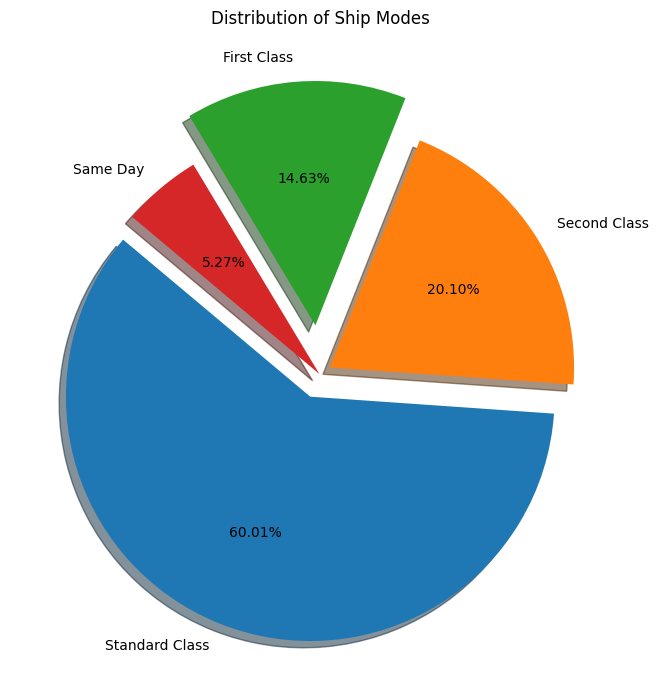

In [364]:
ship_modes = list(df.ship_mode.value_counts().index)
ship_mode_counts = list(df.ship_mode.value_counts().values)
explode = (0.1, 0.05, 0.2, 0)  # Explode the first slice (Standard)

# Create a pie chart with shadows (2D effect)
plt.figure(figsize=(8, 8))
plt.pie(
    ship_mode_counts,
    labels=ship_modes,
    explode=explode,
    autopct='%1.2f%%',
    startangle=140,
    shadow=True
)

# Title and aspect ratio settings
plt.title('Distribution of Ship Modes\n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

## Monthly Sales Trends

In [365]:
monthly_sum_sales = df.groupby('months').agg({"sales($)" : 'sum'})
monthly_sum_sales

,sales($)
months,
Apr,659404.0
Aug,670788.0
Dec,693073.0
Feb,610240.0
Jan,676653.0
Jul,685152.0
Jun,664560.0
Mar,686681.0
May,672547.0


In [366]:
# mengurutkan bulan

ordered_months = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]

Month_CI = pd.CategoricalIndex(
    monthly_sum_sales.index, ordered = True,
    categories = ordered_months

)

Month_CI

CategoricalIndex(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
                  'May', 'Nov', 'Oct', 'Sep'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True, dtype='category', name='months')

In [367]:
monthly_sum_sales.index = Month_CI
monthly_sum_sales = monthly_sum_sales.sort_index()
monthly_sum_sales

,sales($)
months,
Jan,676653.0
Feb,610240.0
Mar,686681.0
Apr,659404.0
May,672547.0
Jun,664560.0
Jul,685152.0
Aug,670788.0
Sep,658844.0


In [368]:
import matplotlib.ticker as ticker

C:\Users\User\AppData\Local\Temp\ipykernel_5800\1041560634.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


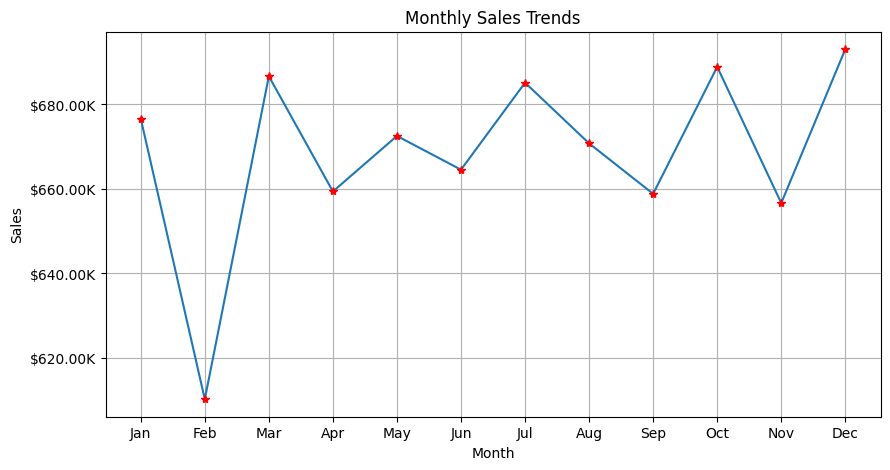

In [369]:
# Create line chart for monthly sales
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    monthly_sum_sales.index,
    monthly_sum_sales["sales($)"],
    marker='*',
    mfc='red', # marker face color
    mec='red', # marker edge color
    linestyle='-'
)

ax.set_title('Monthly Sales Trends')
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.grid(True)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '$' + '{:,.2f}'.format(x/1000) + 'K'))

# Show the line chart
fig.show()

# Visualization Homework
- Buat Visualisasi Univariate atau Bivariate dari Dataset diatas (Gunakan Bar Chart, Pie Chart, atau Line Chart)

- MINIMAL (boleh lebih) 5 Visualisasi Selain yang diatas

## Visualization Idea:

- Order Date vs. Sales/Profit:
Create a time series line plot to visualize how sales or profit has evolved over time.
Use a bar chart to display monthly or quarterly sales or profit.

- Product Category vs. Sales/Profit:
Use a bar chart or a grouped bar chart to compare sales or profit across different product categories.

- Sales vs. Quantity/Discount:
Create scatter plots to visualize the relationship between sales and quantity or discount.
You can use color-coding or size of points to represent different product categories.

- Profit vs. Shipping Cost:
Create a scatter plot to analyze the relationship between profit and shipping cost.
You can use color-coding to represent different regions or segments.

- Order Priority Distribution:
Create a bar chart or a pie chart to show the distribution of order priorities.

- Segment Distribution:
Use a bar chart or a pie chart to show the distribution of customer segments.

- Monthly Trends: Plot line charts or bar charts to visualize how profit, or quantity changes month by month.

- City, State, and Country-wise Analysis: Create geographic heatmaps or bar charts to visualize sales, profit, or quantity distribution by city, state, or country.
You can also use geospatial libraries like Geopandas to plot data on a map.

- Region-wise Analysis:
Create bar charts or stacked bar charts to compare sales, profit, or quantity across different regions.

- Aging Analysis:
Create a histogram or box plot to analyze the distribution of order aging.

- Customer-wise Analysis:
Create a scatter plot or bar chart to visualize the highest-value customers based on sales or profit.


In [370]:
# https://www.learnui.design/tools/data-color-picker.html

In [371]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'aging', 'ship_mode',
       'product_category', 'product', 'sales($)', 'quantity', 'discount',
       'profit($)', 'shipping_cost($)', 'order_priority', 'customer_id',
       'customer_name', 'segment', 'city', 'state', 'country', 'region',
       'months'],
      dtype='object')

In [372]:
df['segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

## 1.&nbsp; **Distribution of Product Category**

In [373]:
df['product_category'].unique()

array(['Auto & Accessories', 'Electronic', 'Fashion', 'Home & Furniture'],
      dtype=object)

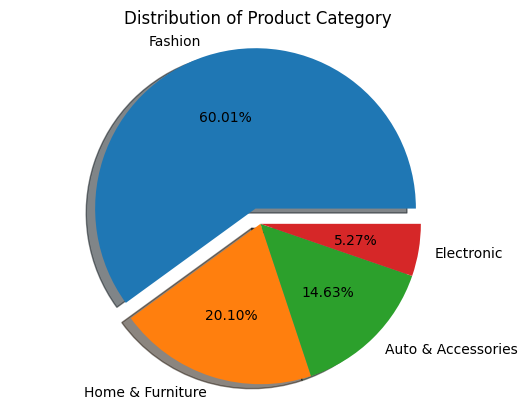

In [374]:
# pie chart
# label & isi
pclabel = list(df['product_category'].value_counts().index)
pccount = list(df['product_category'].value_counts().values)

#explode
explode = (0.1, 0, 0, 0)

# pie chart
plt.pie(pccount, 
        labels = pclabel,
       autopct = '%1.2f%%',
       explode = explode,
       shadow = {'ox' : -0.04,'shade' : 0.9})
# title dan aspek rasio
plt.title('Distribution of Product Category')
plt.axis('equal') # make sure pie drawn as circle

# show pie chart
plt.show()


Kesimpulan dan Insight yang bisa didapat dari visualisasi diatas adalah produk dengan kategori fashion memiliki persentase tertinggi yaitu sebesar 60.01% dibandingkan dengan kategori produk lainnya



## 2.&nbsp; **Distribution of Segment**

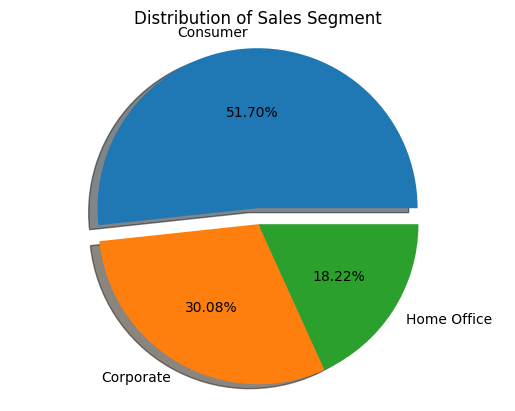

In [375]:
# buat label dan count value
sglabel = list(df['segment'].value_counts().index)
sgcount = list(df['segment'].value_counts())

# explode 
explode = (0.1,0,0)

# buat pie chart
plt.pie(sgcount, 
        labels = sglabel,
       autopct = '%1.2f%%',
       explode = explode,
       shadow = {'ox' : -0.04,'shade' : 0.9})

# title dan aspek rasio
plt.title('Distribution of Sales Segment')
plt.axis('equal') # make sure pie drawn as circle

# show pie chart
plt.show()



Kesimpulan dan Insight yang bisa didapat dari visualisasi daiatas adalah .........



## 3.&nbsp; **Monthly Profit Trends**

In [376]:
monthly_sum_profit = df.groupby('months').agg({'profit($)' : 'sum'})
monthly_sum_profit

,profit($)
months,
Apr,308377.6
Aug,310458.9
Dec,323417.0
Feb,286113.8
Jan,313695.9
Jul,318715.9
Jun,307597.3
Mar,317202.6
May,313766.5


In [377]:
monthly_sum_profit.index

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object', name='months')

In [378]:
monthly_sum_profit

,profit($)
months,
Apr,308377.6
Aug,310458.9
Dec,323417.0
Feb,286113.8
Jan,313695.9
Jul,318715.9
Jun,307597.3
Mar,317202.6
May,313766.5


In [379]:
# mengurutkan bulan
ordered_months = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]

month_ci = pd.CategoricalIndex(
    monthly_sum_profit.index,
    ordered = True,
    categories = ordered_months
)

month_ci

CategoricalIndex(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
                  'May', 'Nov', 'Oct', 'Sep'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True, dtype='category', name='months')

In [380]:
monthly_sum_profit.index = month_ci
monthly_sum_profit = monthly_sum_profit.sort_index()
monthly_sum_profit

,profit($)
months,
Jan,313695.9
Feb,286113.8
Mar,317202.6
Apr,308377.6
May,313766.5
Jun,307597.3
Jul,318715.9
Aug,310458.9
Sep,305349.4


<Axes: xlabel='months', ylabel='profit($)'>

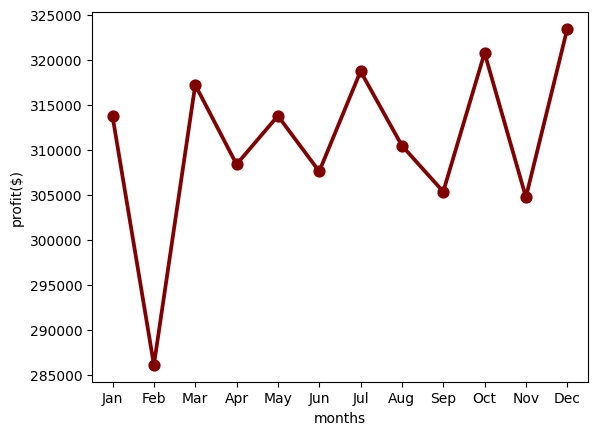

In [381]:
# buat line chart
sns.pointplot(data = monthly_sum_profit,
             x = 'months', 
             y = 'profit($)',
            color = 'maroon'
             )


Kesimpulan dan Insight yang bisa didapat dari visualisasi diatas adalah trend profit yang didapatkan oleh perusahaan, memiliki tren naik dan turun yang sama dengan trend penjualan bulanan



## 4.&nbsp; **Region Profit Analysis**

In [382]:
# buat grup berdasarkan region
dfreg = df.groupby('region').agg({'quantity' : 'count'})
dfreg

# ditemukan 1 data tidak sesuai

,quantity
region,
4orth,1
Africa,4587
Canada,384
Caribbean,1690
Central,11117
Central Asia,2048
EMEA,5029
East,2848
North,4784


In [383]:
df.loc[df['region'] == '4orth'] 

# untuk mengisinya lihat data yang menunjang, samakan dengan negara 

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
25,AU-2015-1020,2015-10-13,2015-10-22,9.0,First Class,Auto & Accessories,Car Body Covers,117.0,1,0.03,...,3.3,High,ON-001020,Burton Ellison,Consumer,Puebla,Puebla,Mexico,4orth,Oct


In [384]:
df.loc[df['country'] == 'Mexico'] 
# data tidak sesuai diisi dengan 'North'

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
24,AU-2015-102,2015-02-24,2015-02-26,2.0,First Class,Auto & Accessories,Car Body Covers,117.0,3,0.03,...,2.6,High,LL-00102,Marshall Carroll,Consumer,Milpa Alta,Distrito Federal,Mexico,North,Feb
25,AU-2015-1020,2015-10-13,2015-10-22,9.0,First Class,Auto & Accessories,Car Body Covers,117.0,1,0.03,...,3.3,High,ON-001020,Burton Ellison,Consumer,Puebla,Puebla,Mexico,4orth,Oct
42,AU-2015-1036,2015-07-19,2015-07-25,6.0,First Class,Auto & Accessories,Car Media Players,140.0,2,0.02,...,5.4,Critical,KI-001036,Fitzgerald Klamczynski,Corporate,León,Guanajuato,Mexico,North,Jul
80,AU-2015-1070,2015-02-13,2015-02-22,9.0,First Class,Auto & Accessories,Car Seat Covers,114.0,4,0.02,...,2.5,High,RD-001070,Hill Ballard,Corporate,Tlalpan,Distrito Federal,Mexico,North,Feb
81,AU-2015-1071,2015-09-06,2015-09-16,10.0,First Class,Auto & Accessories,Car Pillow & Neck Rest,231.0,4,0.01,...,14.2,High,OR-001071,Robles Pryor,Consumer,Obregón,Sonora,Mexico,North,Sep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51172,HF-2015-989,2015-04-06,2015-04-12,6.0,Second Class,Home & Furniture,Umbrellas,70.0,1,0.03,...,7.0,Medium,UM-0041970,Chase Mitchum,Corporate,Toluca,México,Mexico,North,Apr
51229,HF-2015-9940,2015-05-24,2015-05-31,7.0,Second Class,Home & Furniture,Sofa Covers,216.0,5,0.05,...,8.2,High,RE-0050921,Jefferson Macintyre,Consumer,Mexico City,Distrito Federal,Mexico,North,May
51230,HF-2015-9941,2015-03-30,2015-04-06,7.0,Second Class,Home & Furniture,Bed Sheets,211.0,5,0.02,...,11.0,Medium,ON-0050922,Nguyen Emerson,Consumer,Mexico City,Distrito Federal,Mexico,North,Mar
51261,HF-2015-997,2015-02-02,2015-02-04,2.0,Second Class,Home & Furniture,Dinning Tables,119.0,5,0.01,...,3.3,Critical,SA-0041978,Payne Crebassa,Corporate,Juárez,Chihuahua,Mexico,North,Feb


In [385]:
# isi data
df.loc[df['region'] == '4orth', 'region'] = 'North'

In [386]:
# buat grup berdasarkan region
dfreg = df.groupby('region').agg({'quantity' : 'sum'})
dfreg

,quantity
region,
Africa,13631
Canada,1161
Caribbean,4978
Central,33263
Central Asia,6159
EMEA,14988
East,8536
North,14372
North Asia,7105


<Axes: xlabel='quantity', ylabel='region'>

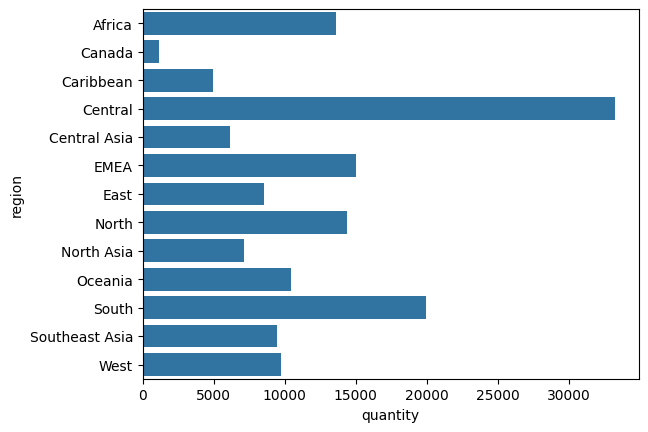

In [387]:
# buat histogram untuk melihat persebaran
sns.barplot(data = dfreg, x = 'quantity', y = 'region')


Kesimpulan dan Insight yang bisa didapat dari visualisasi diatas adalah region central merupakan region dengan kuantitas pembelian barang paling banyak. Hal ini dapat disebabkan karena negara dengan region central diisi oleh negara-negara besar seperti Prancis, German, dan USA (based on tabel data)



In [388]:
# buat filter untuk mengetahui negara apa saja yang berada di region central
dfcentral = df[df['region'] == "Central"]
dfcentral

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
1,AU-2015-10,2015-04-21,2015-05-01,10.0,First Class,Auto & Accessories,Car Media Players,140.0,2,0.02,...,5.4,Critical,TT-0010,Shepard Witt,Consumer,Soyapango,San Salvador,El Salvador,Central,Apr
6,AU-2015-1003,2015-11-06,2015-11-14,8.0,First Class,Auto & Accessories,Car & Bike Care,118.0,4,0.03,...,2.4,Critical,RD-001003,Bell Bickford,Consumer,Boulogne-Billancourt,Ile-de-France,France,Central,Nov
7,AU-2015-1004,2015-12-08,2015-12-15,7.0,First Class,Auto & Accessories,Tyre,250.0,3,0.03,...,14.8,High,ON-001004,Cox Blanton,Consumer,Strasbourg,Alsace,France,Central,Dec
13,AU-2015-101,2015-08-07,2015-04-23,6.0,First Class,Auto & Accessories,Car Speakers,211.0,5,0.03,...,9.9,Critical,RN-00101,Cook Bern,Consumer,Amsterdam,North Holland,Netherlands,Central,Apr
14,AU-2015-1010,2015-11-17,2015-11-20,3.0,First Class,Auto & Accessories,Car Speakers,211.0,5,0.04,...,8.9,Medium,LD-001010,White Armold,Consumer,Paris,Ile-de-France,France,Central,Nov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51271,HF-2015-9979,2015-09-29,2015-10-08,9.0,Second Class,Home & Furniture,Dinner Crockery,133.0,5,0.01,...,4.6,High,RE-0050960,Knox Sayre,Consumer,Chicago,Illinois,United States,Central,Sep
51274,HF-2015-9981,2015-08-06,2015-08-13,7.0,Second Class,Home & Furniture,Bed Sheets,211.0,3,0.01,...,12.5,High,ON-0050962,Yates Johnson,Consumer,Holland,Michigan,United States,Central,Aug
51280,HF-2015-9987,2015-07-17,2015-07-19,2.0,Second Class,Home & Furniture,Shoe Rack,124.0,5,0.01,...,3.8,Medium,AN-0050968,Morrison Edelman,Consumer,Romeoville,Illinois,United States,Central,Jul
51285,HF-2015-9991,2015-09-18,2015-09-23,5.0,Second Class,Home & Furniture,Bed Sheets,211.0,4,0.02,...,11.4,Medium,LE-0050972,Mcdowell Roelle,Consumer,Tegucigalpa,Francisco Morazán,Honduras,Central,Sep


In [389]:
# menjumlahkan total kuantitas barang per negara
dfcentral = dfcentral.groupby('country').agg({'quantity' : 'sum'})
dfcentral

,quantity
country,
Austria,797
Belgium,443
El Salvador,2217
France,8379
Germany,6155
Guatemala,1525
Honduras,2177
Netherlands,1297
Nicaragua,1817


## 5.&nbsp; **Aging Distribution**

<Axes: xlabel='aging', ylabel='Count'>

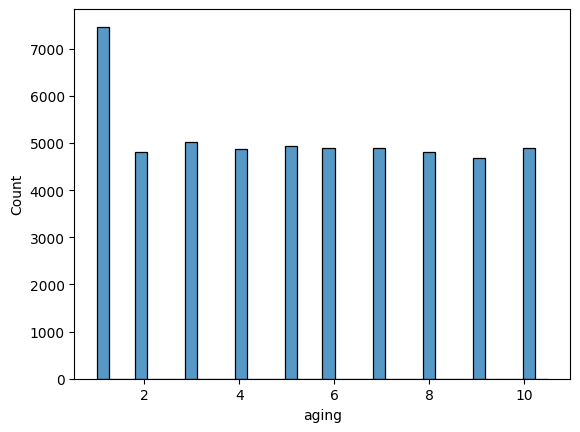

In [390]:
# buat bar plot 
sns.histplot(df,
             x = 'aging',
            )


Kesimpulan dan Insight yang bisa didapat dari visualisasi diatas adalah frekuensi lama barang dalam penyimpanan paling tinggi adalah 1 hari



In [305]:
df['aging'].unique()

array([ 8. , 10. ,  2. ,  3. ,  7. ,  5. ,  6. ,  4. ,  9. ,  1. , 10.5])